<a href="https://colab.research.google.com/github/nthammadi-uncc/electricity_usage_analysis/blob/main/Jupyter%20Notebooks/Modeling_and_Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electricity Usage Analytics of all states in USA

## Modeling and Predictive Analysis

### Import Libraries and Packages

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif,f_regression
from sklearn.metrics import mean_squared_error
from numpy import set_printoptions

In [2]:
# Function to read data from URL
def read_data_from_URL(url):
    df=pd.read_csv(url)
    return df

In [3]:
data_url='https://raw.githubusercontent.com/nthammadi-uncc/electricity_usage_analysis/main/Data/final_electricity_data.csv'
electricity_analysis_df = read_data_from_URL(data_url)
electricity_analysis_df.head()

,Unnamed: 0,YEAR,STATE,STATE_NAME,ELECTION_RESULT,CHANGE_IN_GOVT,COAL,GEOTHERMAL,HYDROELECTRIC CONVENTIONAL,NATURAL GAS,...,GEOTHERMAL (BILLION BTU),NATURAL GAS (MCF),OTHER GASES (BILLION BTU),PETROLEUM (BARRELS),Median Income,PRICE_INFLATION_RATE,ELECTRICITY_REVENUE_GROWTH,Carbon_dioxide(MT),Sulphur_dioxide(MT),Nitric_oxide(MT)
0,0,2001,AK,ALASKA,RED,0.0,0.003576,0.000000,0.014656,0.015239,...,0.000000,0.022883,0.00000,0.025847,57363.0,0.067115,0.073740,0.017295,0.006623,0.043238
1,1,2001,AL,ALABAMA,RED,0.0,0.457250,0.000000,0.091011,0.037604,...,0.000000,0.048055,0.05108,0.014785,35160.0,0.008211,-0.051074,0.294601,0.405428,0.424890
2,2,2001,AR,ARKANSAS,RED,0.0,0.156840,0.000000,0.027753,0.010589,...,0.000000,0.014917,0.00000,0.022526,33339.0,0.059380,0.052058,0.106483,0.073470,0.124335
3,3,2001,AZ,ARIZONA,RED,0.0,0.253720,0.000000,0.083029,0.050355,...,0.000000,0.068575,0.00000,0.010114,42704.0,0.045768,0.021301,0.175738,0.058488,0.220068
4,4,2001,CA,CALIFORNIA,BLUE,0.0,0.014141,0.929493,0.278179,0.437868,...,0.946401,0.544199,0.20317,0.092529,47262.0,0.278628,0.202604,0.267917,0.036000,0.265099


In [4]:
#drop the first column that is not needed
electricity_analysis_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
electricity_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   YEAR                            969 non-null    int64  
 1   STATE                           969 non-null    object 
 2   STATE_NAME                      969 non-null    object 
 3   ELECTION_RESULT                 969 non-null    object 
 4   CHANGE_IN_GOVT                  969 non-null    float64
 5   COAL                            969 non-null    float64
 6   GEOTHERMAL                      969 non-null    float64
 7   HYDROELECTRIC CONVENTIONAL      969 non-null    float64
 8   NATURAL GAS                     969 non-null    float64
 9   NUCLEAR                         969 non-null    float64
 10  OTHER                           969 non-null    float64
 11  OTHER BIOMASS                   969 non-null    float64
 12  OTHER GASES                     969 

In [6]:
electricity_analysis_df.describe()

,YEAR,CHANGE_IN_GOVT,COAL,GEOTHERMAL,HYDROELECTRIC CONVENTIONAL,NATURAL GAS,NUCLEAR,OTHER,OTHER BIOMASS,OTHER GASES,...,GEOTHERMAL (BILLION BTU),NATURAL GAS (MCF),OTHER GASES (BILLION BTU),PETROLEUM (BARRELS),Median Income,PRICE_INFLATION_RATE,ELECTRICITY_REVENUE_GROWTH,Carbon_dioxide(MT),Sulphur_dioxide(MT),Nitric_oxide(MT)
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,...,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000
mean,2010.000000,0.099071,0.207318,0.022688,0.057796,0.078763,0.157396,0.081559,0.124195,0.041092,...,0.021674,0.082928,0.039320,0.028975,52225.255934,0.038155,0.033997,0.164699,0.104565,0.141437
std,5.480054,0.298912,0.215022,0.133130,0.135739,0.142365,0.207461,0.131444,0.195485,0.109427,...,0.127710,0.147892,0.102257,0.086501,11028.859836,0.059653,0.060683,0.163050,0.159387,0.146084
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,29359.000000,-0.269975,-0.291972,0.000000,0.000000,0.000000
25%,2005.000000,0.000000,0.022519,0.000000,0.005500,0.006916,0.000000,0.012946,0.007563,0.000000,...,0.000000,0.009105,0.000000,0.001210,43974.000000,0.006822,-0.001130,0.047935,0.010661,0.038578
50%,2010.000000,0.000000,0.159885,0.000000,0.015517,0.028549,0.091575,0.027419,0.034552,0.000000,...,0.000000,0.030287,0.000000,0.004865,50704.000000,0.032595,0.029944,0.126768,0.041925,0.102940
75%,2015.000000,0.000000,0.271722,0.000000,0.037068,0.082342,0.284197,0.108877,0.149413,0.017736,...,0.000000,0.086064,0.021462,0.021526,59094.000000,0.060750,0.067018,0.220702,0.112707,0.186051
max,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,95572.000000,0.377947,0.346392,1.000000,1.000000,1.000000


### Definition of Dataset:

The dataset has 969 rows and 30 features. List of features and their description is below:
<ol>
    <li>YEAR: Year ranging from 2001 to 2019</li>
    <li>STATE: Abbreviation of State</li>
    <li>STATE_NAME: Name of the State</li>
    <li>ELECTION_RESULT: This shows if the state during that year was under Republic(RED) or Democratic(BLUE) government</li>
    <li>CHANGE_IN_GOVT: This binary field has 0 if there is no change in government from the previous election term and has 1 if there is a change</li>
    <b>Features 5-18 are related to Electricity Generation</b>
    <li>COAL</li>
    <li>GEOTHERMAL</li>
    <li>HYDROELECTRIC CONVENTIONAL</li>
    <li>NATURAL GAS</li>
    <li>NUCLEAR</li>
    <li>OTHER</li>
    <li>OTHER BIOMASS</li>
    <li>OTHER GASES</li>
    <li>PETROLEUM</li>
    <li>PUMPED STORAGE</li>
    <li>SOLAR THERMAL AND PHOTOVOLTAIC</li>
    <li>WIND</li>
    <li>WOOD AND WOOD DERIVED FUELS</li>
    <li>GENERATION_TOTAL: Total Electricity generated in the state during the year through all Energy sources</li>
    <b>Features 19-23 are related to Electricity Consumption</b>
    <li>COAL (SHORT TONS)</li>
    <li>GEOTHERMAL (BILLION BTU)</li>
    <li>NATURAL GAS (MCF)</li>
    <li>OTHER GASES (BILLION BTU)</li>
    <li>PETROLEUM (BARRELS)</li>
    <li>Median Income: Median Income of the state during the year</li>
    <li>PRICE_INFLATION_RATE: Rate at which the price of Electricity has been since the previous year</li>
    <li>ELECTRICITY_REVENUE_GROWTH: Growth of Revenue generated through Electricity</li>
    <b>Features 26-29 are related to Emissions - Carbondioxide, Sulphurdioxide and Nitricoxide in the state through the year</b>
    <li>Carbon_dioxide(MT)</li>
    <li>Sulphur_dioxide(MT)</li>
    <li>Nitric_oxide(MT)</li>
</ol>

## Exploring the variables

<AxesSubplot:xlabel='ELECTION_RESULT', ylabel='count'>

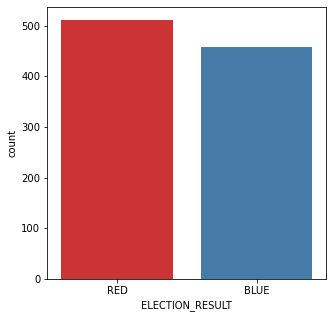

In [7]:
#bar graph of categorical variable - ELECTION_RESULT
plt.rcParams["figure.figsize"] = [5,5]
sns.countplot(x='ELECTION_RESULT', data=electricity_analysis_df, palette="Set1")

#### Data seems to be almost evenly distributed between Red and Blue states

<AxesSubplot:xlabel='CHANGE_IN_GOVT', ylabel='count'>

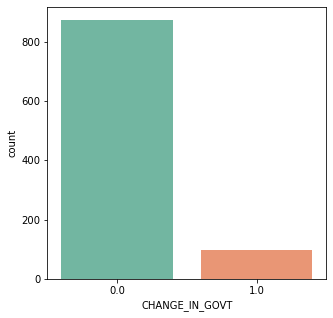

In [8]:
#bar graph of categorical variable - ELECTION_RESULT
plt.rcParams["figure.figsize"] = [5,5]
sns.countplot(x='CHANGE_IN_GOVT', data=electricity_analysis_df, palette="Set2")

#### There isn't a lot of change in ruling parties between the years, which means a state is predominantly associated to a single ruling party over the years except for a few cases.

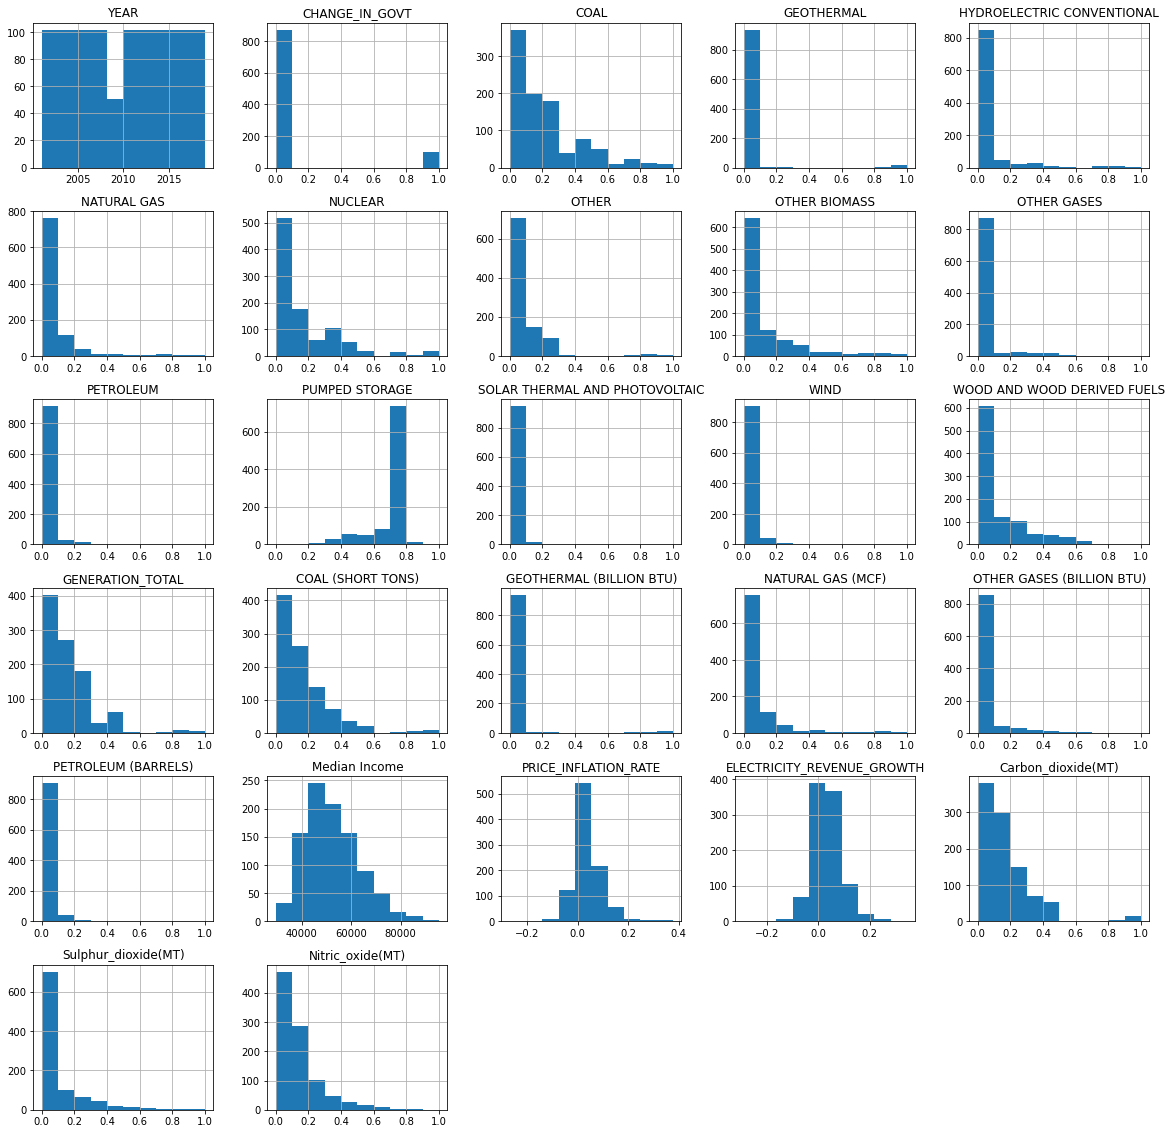

In [9]:
#The graphs shows how the data is distributed for every single attribute of the dataset
plt.rcParams["figure.figsize"] = [20,20]
electricity_analysis_df.hist()
plt.show()

#### We see some of the features are skewed

Text(0.5, 1.0, 'Electricity Generation Distribution - Total Generation')

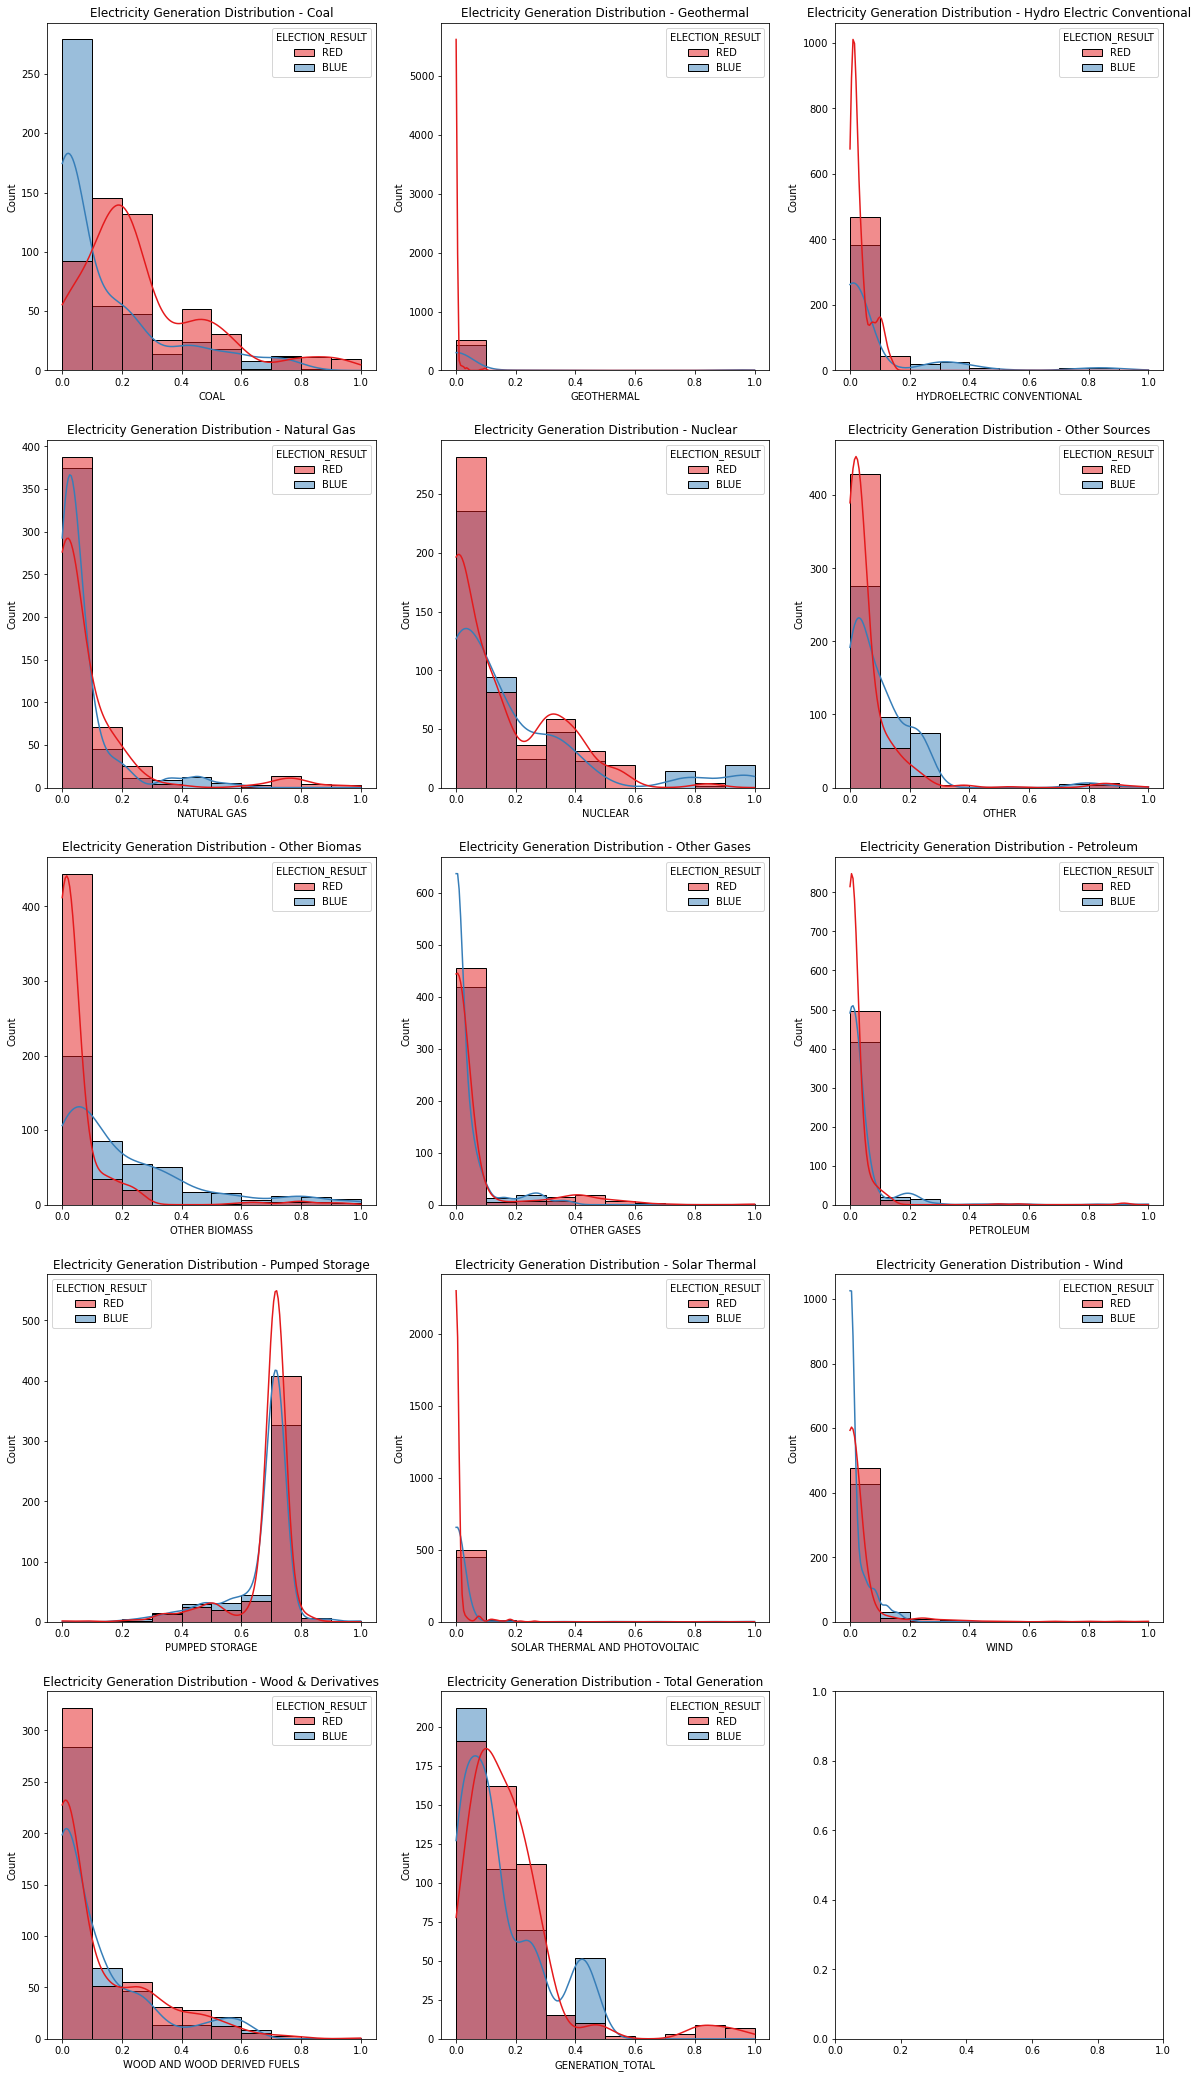

In [10]:
#Create univariate plots for Electricity Generation features
fig, axes = plt.subplots(5, 3, figsize=(20, 20))
plt.subplots_adjust(left=None, bottom=0.1, right=None, top=1.5, wspace=None, hspace=None)
sns.histplot(ax=axes[0, 0], data=electricity_analysis_df, x='COAL', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[0, 0].set_title('Electricity Generation Distribution - Coal')
sns.histplot(ax=axes[0, 1], data=electricity_analysis_df, x='GEOTHERMAL', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[0, 1].set_title('Electricity Generation Distribution - Geothermal')
sns.histplot(ax=axes[0, 2], data=electricity_analysis_df, x='HYDROELECTRIC CONVENTIONAL', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[0, 2].set_title('Electricity Generation Distribution - Hydro Electric Conventional')
sns.histplot(ax=axes[1, 0], data=electricity_analysis_df, x='NATURAL GAS', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[1, 0].set_title('Electricity Generation Distribution - Natural Gas')
sns.histplot(ax=axes[1, 1], data=electricity_analysis_df, x='NUCLEAR', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[1, 1].set_title('Electricity Generation Distribution - Nuclear')
sns.histplot(ax=axes[1, 2], data=electricity_analysis_df, x='OTHER', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[1, 2].set_title('Electricity Generation Distribution - Other Sources')
sns.histplot(ax=axes[2, 0], data=electricity_analysis_df, x='OTHER BIOMASS', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[2, 0].set_title('Electricity Generation Distribution - Other Biomas')
sns.histplot(ax=axes[2, 1], data=electricity_analysis_df, x='OTHER GASES', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[2, 1].set_title('Electricity Generation Distribution - Other Gases')
sns.histplot(ax=axes[2, 2], data=electricity_analysis_df, x='PETROLEUM', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[2, 2].set_title('Electricity Generation Distribution - Petroleum')
sns.histplot(ax=axes[3, 0], data=electricity_analysis_df, x='PUMPED STORAGE', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[3, 0].set_title('Electricity Generation Distribution - Pumped Storage')
sns.histplot(ax=axes[3, 1], data=electricity_analysis_df, x='SOLAR THERMAL AND PHOTOVOLTAIC', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[3, 1].set_title('Electricity Generation Distribution - Solar Thermal')
sns.histplot(ax=axes[3, 2], data=electricity_analysis_df, x='WIND', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[3, 2].set_title('Electricity Generation Distribution - Wind')
sns.histplot(ax=axes[4, 0], data=electricity_analysis_df, x='WOOD AND WOOD DERIVED FUELS', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[4, 0].set_title('Electricity Generation Distribution - Wood & Derivatives')
sns.histplot(ax=axes[4, 1], data=electricity_analysis_df, x='GENERATION_TOTAL', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[4, 1].set_title('Electricity Generation Distribution - Total Generation')

#### We see some trends with Red and Blue states, especially for Electricity generation using coal which is a little more in Red states. We also see blue state adopting Geothermal and Solar electricity generation slightly more than red states. Both have a similar trend towards wood and wooded derived fuels.

Text(0.5, 1.0, 'Electricity Consumption Distribution - Petroleum')

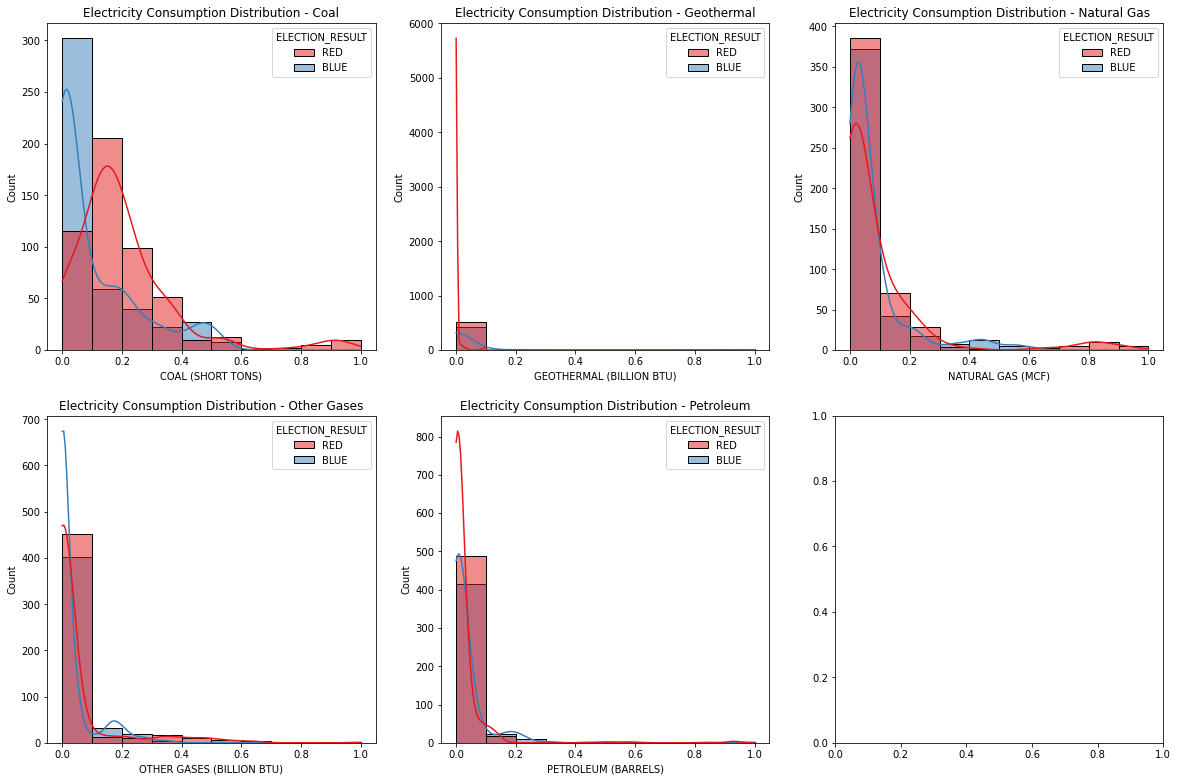

In [11]:
#Create univariate plots for Electricity Consumption features
fig, axes = plt.subplots(2, 3, figsize=(20, 5))
plt.subplots_adjust(left=None, bottom=0.0, right=None, top=2, wspace=None, hspace=None)
sns.histplot(ax=axes[0, 0], data=electricity_analysis_df, x='COAL (SHORT TONS)', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[0, 0].set_title('Electricity Consumption Distribution - Coal')
sns.histplot(ax=axes[0, 1], data=electricity_analysis_df, x='GEOTHERMAL (BILLION BTU)', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[0, 1].set_title('Electricity Consumption Distribution - Geothermal')
sns.histplot(ax=axes[0, 2], data=electricity_analysis_df, x='NATURAL GAS (MCF)', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[0, 2].set_title('Electricity Consumption Distribution - Natural Gas')
sns.histplot(ax=axes[1, 0], data=electricity_analysis_df, x='OTHER GASES (BILLION BTU)', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[1, 0].set_title('Electricity Consumption Distribution - Other Gases')
sns.histplot(ax=axes[1, 1], data=electricity_analysis_df, x='PETROLEUM (BARRELS)', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[1, 1].set_title('Electricity Consumption Distribution - Petroleum')

#### We see some trends with Red and Blue states, especially for Electricity consumption using coal which is a little more in Red states. 

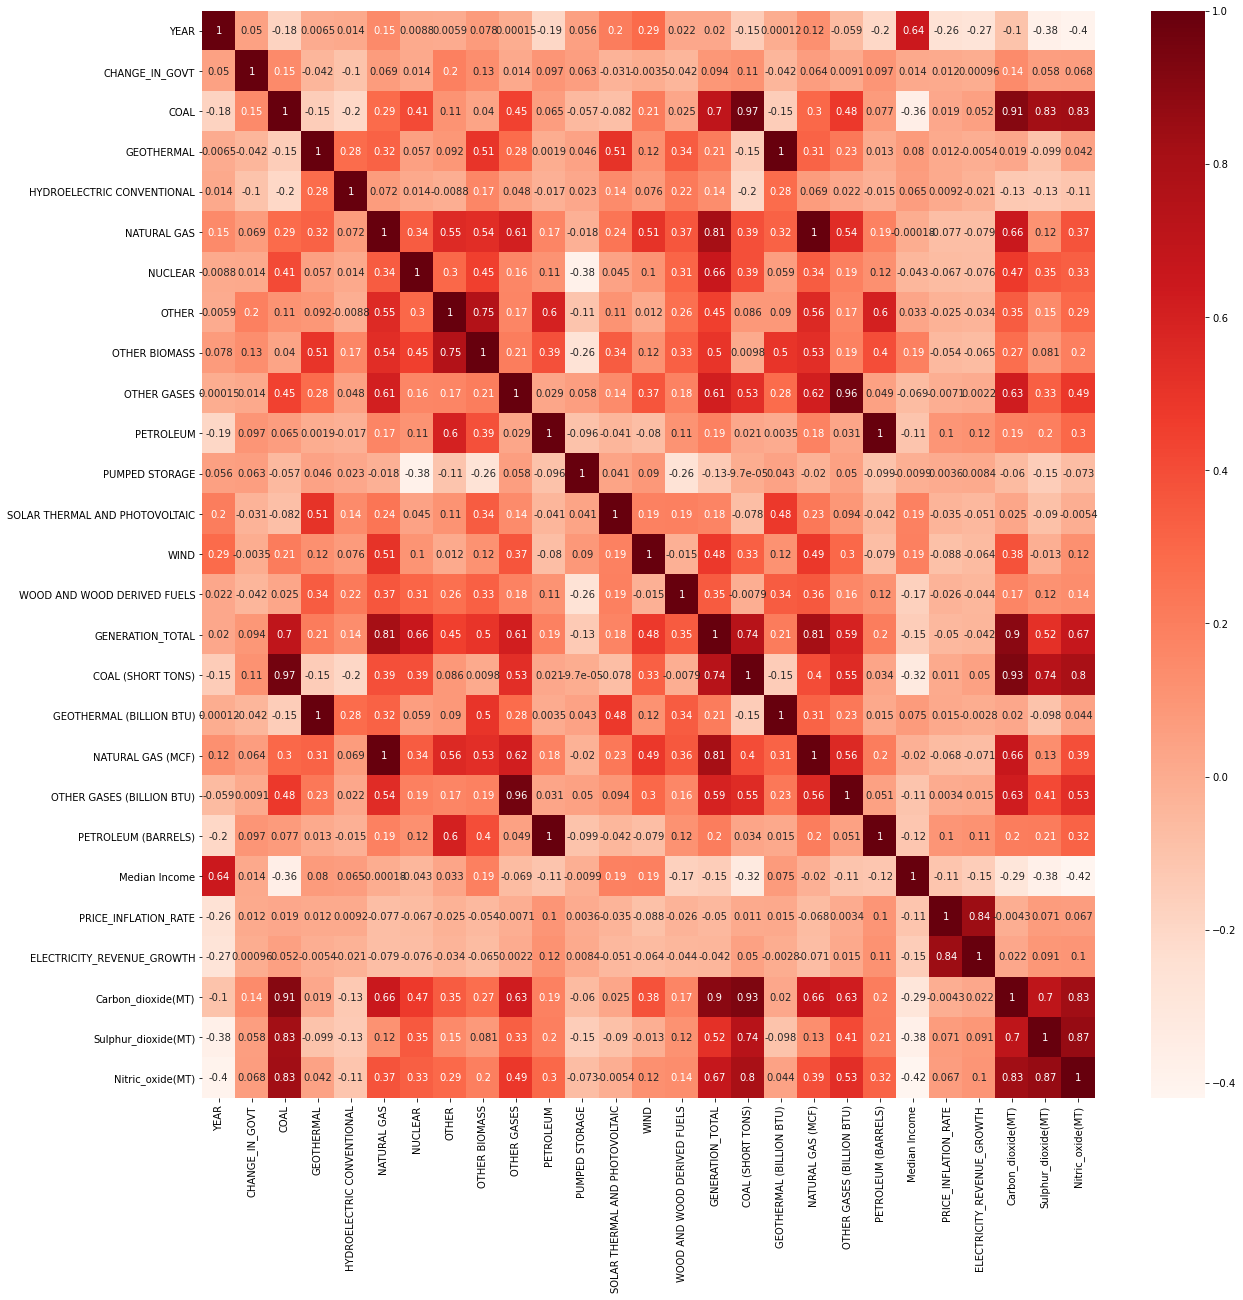

In [12]:
#Generate correlation matrix 
plt.figure(figsize=(20,20))
sns.heatmap(electricity_analysis_df.corr(), annot=True ,cmap='Reds')
plt.show()

### Correlation between variables

We see some strong correlations between variables within the dataset. Some of them are:
<ol>
    <li>Electricity Generation and Consumption using Coal are highly correlated.</li>
    <li>Electricity Generation and Consumption through Coal and Emissions(Carbon dioxide, Sulphur dioxide, Nitric oxide) are highly correlated</li>
    <li>Electricity Generation through Coal, Natural Gas, Nuclear and Other gases are also highly correlated to Generation Total which might indicate that a majority of contribution to Electricity Generation might be through these sources</li>
    <li>Electricity Generation and Consumption using Geothermal, Natural Gas, Other gases and Petroleum sources respectively are highly correlated.</li>
    <li>Electricity Generation through Geothermal and Solar Thermal sources are correlated.</li>
    <li>Electricity Price inflation rate and Revenue growth are highly correlated</li>
    <li>All Emissions(Carbon dioxide, Sulphur dioxide, Nitric oxide) are highly correlated to each other</li>
</ol>

## Predicting air pollutant emission using XGBoost and MultiOutputRegressor

### Selecting the target variable from the different emissions

In [13]:
#function to get top n number of rows sorted by a particular column
def get_top_results_per_year(df,top_num,col_name, ascending):
    year_list=sorted(df['YEAR'].unique())
    df_list=[]
    
    for year in year_list:
        temp_df=df[(df['YEAR']== year)][['YEAR','STATE','ELECTION_RESULT','Carbon_dioxide(MT)','Sulphur_dioxide(MT)','Nitric_oxide(MT)']].sort_values(col_name, ascending=ascending).head(top_num)
        df_list.append(temp_df)
    
    return pd.concat(df_list)    


In [14]:
top_10_carbon_emissions=get_top_results_per_year(electricity_analysis_df,10,'Carbon_dioxide(MT)',False)
top_10_sulphur_emissions=get_top_results_per_year(electricity_analysis_df,10,'Sulphur_dioxide(MT)',False)
top_10_nitrous_emissions=get_top_results_per_year(electricity_analysis_df,10,'Nitric_oxide(MT)',False)     

In [15]:
top_10_carbon_emissions.head()

,YEAR,STATE,ELECTION_RESULT,Carbon_dioxide(MT),Sulphur_dioxide(MT),Nitric_oxide(MT)
43,2001,TX,RED,0.956080,0.539252,1.000000
9,2001,FL,BLUE,0.461961,0.480109,0.741989
35,2001,OH,RED,0.447503,0.957948,0.782159
15,2001,IN,RED,0.443538,0.644223,0.738623
38,2001,PA,BLUE,0.423627,0.858892,0.571021


In [16]:
top_10_carbon_emissions['STATE'].value_counts()

IL    19
KY    19
TX    19
OH    19
FL    19
IN    19
PA    19
WV    15
AL    12
MO    11
GA    11
MI     8
Name: STATE, dtype: int64

In [17]:
top_10_sulphur_emissions.head()

,YEAR,STATE,ELECTION_RESULT,Carbon_dioxide(MT),Sulphur_dioxide(MT),Nitric_oxide(MT)
35,2001,OH,RED,0.447503,0.957948,0.782159
38,2001,PA,BLUE,0.423627,0.858892,0.571021
15,2001,IN,RED,0.443538,0.644223,0.738623
49,2001,WV,RED,0.282923,0.544944,0.685607
43,2001,TX,RED,0.956080,0.539252,1.000000


In [18]:
top_10_sulphur_emissions['STATE'].value_counts()

IN    19
PA    19
TX    19
OH    19
KY    17
AL    15
GA    14
MI    13
IL    12
MO    11
WV     8
FL     8
NC     7
AR     3
LA     3
NE     1
WI     1
TN     1
Name: STATE, dtype: int64

In [19]:
top_10_nitrous_emissions.head()

,YEAR,STATE,ELECTION_RESULT,Carbon_dioxide(MT),Sulphur_dioxide(MT),Nitric_oxide(MT)
43,2001,TX,RED,0.956080,0.539252,1.000000
35,2001,OH,RED,0.447503,0.957948,0.782159
9,2001,FL,BLUE,0.461961,0.480109,0.741989
15,2001,IN,RED,0.443538,0.644223,0.738623
49,2001,WV,RED,0.282923,0.544944,0.685607


In [20]:
top_10_nitrous_emissions['STATE'].value_counts()

PA    19
OH    19
IN    19
FL    19
TX    19
KY    16
MI    13
CA    11
IL    10
LA     9
WV     8
AL     7
GA     7
MO     7
NC     4
WY     1
OK     1
WI     1
Name: STATE, dtype: int64

#### We see different states being the highest emitters of different air pollutant gases. So we will proceed with having all these of these as our target variables

### Feature Selection using SelectKBest method

In [21]:
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()
# FIT AND TRANSFORM
electricity_analysis_df['RULING_PARTY'] = electricity_analysis_df[['ELECTION_RESULT']].apply(le.fit_transform)
electricity_analysis_df.head()

,YEAR,STATE,STATE_NAME,ELECTION_RESULT,CHANGE_IN_GOVT,COAL,GEOTHERMAL,HYDROELECTRIC CONVENTIONAL,NATURAL GAS,NUCLEAR,...,NATURAL GAS (MCF),OTHER GASES (BILLION BTU),PETROLEUM (BARRELS),Median Income,PRICE_INFLATION_RATE,ELECTRICITY_REVENUE_GROWTH,Carbon_dioxide(MT),Sulphur_dioxide(MT),Nitric_oxide(MT),RULING_PARTY
0,2001,AK,ALASKA,RED,0.0,0.003576,0.000000,0.014656,0.015239,0.000000,...,0.022883,0.00000,0.025847,57363.0,0.067115,0.073740,0.017295,0.006623,0.043238,1
1,2001,AL,ALABAMA,RED,0.0,0.457250,0.000000,0.091011,0.037604,0.307458,...,0.048055,0.05108,0.014785,35160.0,0.008211,-0.051074,0.294601,0.405428,0.424890,1
2,2001,AR,ARKANSAS,RED,0.0,0.156840,0.000000,0.027753,0.010589,0.149701,...,0.014917,0.00000,0.022526,33339.0,0.059380,0.052058,0.106483,0.073470,0.124335,1
3,2001,AZ,ARIZONA,RED,0.0,0.253720,0.000000,0.083029,0.050355,0.290919,...,0.068575,0.00000,0.010114,42704.0,0.045768,0.021301,0.175738,0.058488,0.220068,1
4,2001,CA,CALIFORNIA,BLUE,0.0,0.014141,0.929493,0.278179,0.437868,0.336450,...,0.544199,0.20317,0.092529,47262.0,0.278628,0.202604,0.267917,0.036000,0.265099,0


In [22]:
#create the X and y for fitting to models
X=electricity_analysis_df[electricity_analysis_df.columns.difference(['ELECTION_RESULT','STATE','STATE_NAME','YEAR','Carbon_dioxide(MT)','Sulphur_dioxide(MT)','Nitric_oxide(MT)'])]
X.head()

,CHANGE_IN_GOVT,COAL,COAL (SHORT TONS),ELECTRICITY_REVENUE_GROWTH,GENERATION_TOTAL,GEOTHERMAL,GEOTHERMAL (BILLION BTU),HYDROELECTRIC CONVENTIONAL,Median Income,NATURAL GAS,...,OTHER GASES,OTHER GASES (BILLION BTU),PETROLEUM,PETROLEUM (BARRELS),PRICE_INFLATION_RATE,PUMPED STORAGE,RULING_PARTY,SOLAR THERMAL AND PHOTOVOLTAIC,WIND,WOOD AND WOOD DERIVED FUELS
0,0.0,0.003576,0.005399,0.073740,0.013884,0.000000,0.000000,0.014656,57363.0,0.015239,...,0.000000,0.00000,0.023522,0.025847,0.067115,0.716191,1,1.778938e-07,0.000011,0.000111
1,0.0,0.457250,0.307881,-0.051074,0.259351,0.000000,0.000000,0.091011,35160.0,0.037604,...,0.031527,0.05108,0.011146,0.014785,0.008211,0.716191,1,1.778938e-07,0.000000,0.670928
2,0.0,0.156840,0.137104,0.052058,0.097599,0.000000,0.000000,0.027753,33339.0,0.010589,...,0.000000,0.00000,0.022103,0.022526,0.059380,0.716191,1,1.778938e-07,0.000000,0.242036
3,0.0,0.253720,0.183996,0.021301,0.186014,0.000000,0.000000,0.083029,42704.0,0.050355,...,0.000000,0.00000,0.008181,0.010114,0.045768,0.804527,1,1.743782e-05,0.000000,0.000111
4,0.0,0.014141,0.008803,0.202604,0.410958,0.929493,0.946401,0.278179,47262.0,0.437868,...,0.188433,0.20317,0.075690,0.092529,0.278628,0.604390,0,1.914038e-02,0.041853,0.534509


#### Best features for target - Carbon_dioxide(MT)

In [23]:
y=electricity_analysis_df['Carbon_dioxide(MT)']
y.head()

0    0.017295
1    0.294601
2    0.106483
3    0.175738
4    0.267917
Name: Carbon_dioxide(MT), dtype: float64

In [24]:
# feature extraction using Pearson’s Correlation Coefficient for target - Carbon_dioxide(MT)
test = SelectKBest(score_func=f_regression, k=5)
fit = test.fit(X, y)

# summarize scores
set_printoptions(formatter={'float_kind':'{:f}'.format}, precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[:,:])

[19.944915 4448.460103 6333.356823 0.467700 4120.570256 0.338109 0.377975
 16.374131 88.812800 730.518590 765.910454 279.584500 130.857612 76.694904
 626.811656 630.238718 34.954773 42.192154 0.017773 3.500083 53.616141
 0.587548 166.303744 29.553086]
[[0.003576 0.005399 0.013884 0.015239 0.022883]
 [0.457250 0.307881 0.259351 0.037604 0.048055]
 [0.156840 0.137104 0.097599 0.010589 0.014917]
 ...
 [0.166789 0.134110 0.129849 0.079547 0.078750]
 [0.368479 0.215168 0.132232 0.008776 0.010079]
 [0.224044 0.198330 0.087155 0.004027 0.003815]]


In [25]:
X.columns.to_list()

['CHANGE_IN_GOVT',
 'COAL',
 'COAL (SHORT TONS)',
 'ELECTRICITY_REVENUE_GROWTH',
 'GENERATION_TOTAL',
 'GEOTHERMAL',
 'GEOTHERMAL (BILLION BTU)',
 'HYDROELECTRIC CONVENTIONAL',
 'Median Income',
 'NATURAL GAS',
 'NATURAL GAS (MCF)',
 'NUCLEAR',
 'OTHER',
 'OTHER BIOMASS',
 'OTHER GASES',
 'OTHER GASES (BILLION BTU)',
 'PETROLEUM',
 'PETROLEUM (BARRELS)',
 'PRICE_INFLATION_RATE',
 'PUMPED STORAGE',
 'RULING_PARTY',
 'SOLAR THERMAL AND PHOTOVOLTAIC',
 'WIND',
 'WOOD AND WOOD DERIVED FUELS']

#### Using SelectKBest approach with Pearson’s Correlation Coefficient method, the best features for target variable - Carbon_dioxide(MT) - are related to indexes: 1, 2, 4, 9, 10, 14, 15  which are COAL,  COAL (SHORT TONS), GENERATION_TOTAL, NATURAL GAS, NATURAL GAS (MCF), OTHER GASES, OTHER GASES (BILLION BTU)

In [26]:
y=electricity_analysis_df['Sulphur_dioxide(MT)']
y.head()

0    0.006623
1    0.405428
2    0.073470
3    0.058488
4    0.036000
Name: Sulphur_dioxide(MT), dtype: float64

In [27]:
# feature extraction using Pearson’s Correlation Coefficient for target - Sulphur_dioxide(MT)
test = SelectKBest(score_func=f_regression, k=5)
fit = test.fit(X, y)

# summarize scores
set_printoptions(formatter={'float_kind':'{:f}'.format}, precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[:,:])

[3.268860 2090.418067 1147.428233 8.016019 359.730817 9.582076 9.418167
 17.210445 163.787849 13.699653 17.038750 138.678086 21.116312 6.338025
 118.751971 199.622802 39.201429 44.438105 4.870219 21.696390 21.517509
 7.812286 0.175767 12.963653]
[[0.003576 0.005399 0.013884 57363.000000 0.000000]
 [0.457250 0.307881 0.259351 35160.000000 0.051080]
 [0.156840 0.137104 0.097599 33339.000000 0.000000]
 ...
 [0.166789 0.134110 0.129849 67355.000000 0.000000]
 [0.368479 0.215168 0.132232 53706.000000 0.003482]
 [0.224044 0.198330 0.087155 65134.000000 0.036506]]


#### Using SelectKBest approach with Pearson’s Correlation Coefficient method, the best features for target variable - Sulphur_dioxide(MT) - are related to indexes: 1, 2, 4, 8, 11, 14, 15  which are COAL,  COAL (SHORT TONS), GENERATION_TOTAL, Median Income, NUCLEAR, OTHER GASES, OTHER GASES (BILLION BTU)

In [28]:
y=electricity_analysis_df['Nitric_oxide(MT)']
y.head()

0    0.043238
1    0.424890
2    0.124335
3    0.220068
4    0.265099
Name: Nitric_oxide(MT), dtype: float64

In [29]:
# feature extraction using Pearson’s Correlation Coefficient for target - Nitric_oxide(MT)
test = SelectKBest(score_func=f_regression, k=5)
fit = test.fit(X, y)

# summarize scores
set_printoptions(formatter={'float_kind':'{:f}'.format}, precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[:,:])

[4.506571 2199.901186 1755.022147 9.755303 795.652629 1.748313 1.865949
 12.381400 206.472065 157.069003 177.460377 119.404230 89.781331 40.050996
 304.346644 378.473657 95.279580 107.006792 4.342557 5.135063 51.257246
 0.028409 14.793234 18.210105]
[[0.003576 0.005399 0.013884 0.000000 0.000000]
 [0.457250 0.307881 0.259351 0.031527 0.051080]
 [0.156840 0.137104 0.097599 0.000000 0.000000]
 ...
 [0.166789 0.134110 0.129849 0.000000 0.000000]
 [0.368479 0.215168 0.132232 0.006930 0.003482]
 [0.224044 0.198330 0.087155 0.047666 0.036506]]


#### Using SelectKBest approach with Pearson’s Correlation Coefficient method, the best features for target variable - Sulphur_dioxide(MT) - are related to indexes: 1, 2, 4, 8, 9, 10, 14, 15  which are COAL,  COAL (SHORT TONS), GENERATION_TOTAL, Median Income, NATURAL GAS, NATURAL GAS (MCF), OTHER GASES, OTHER GASES (BILLION BTU)

#### The SelectKBest approach showed different best features for different target variable with some common features. 
#### Running another feature selection to check best features for multiple output target variables

### Feature Selection using Recursive Feature Elimination and Cross-Validation Selection for multi-output variables

In [30]:
#multi-output or multi-target y
y=electricity_analysis_df[['Carbon_dioxide(MT)','Sulphur_dioxide(MT)','Nitric_oxide(MT)']]
y.head()

,Carbon_dioxide(MT),Sulphur_dioxide(MT),Nitric_oxide(MT)
0,0.017295,0.006623,0.043238
1,0.294601,0.405428,0.424890
2,0.106483,0.073470,0.124335
3,0.175738,0.058488,0.220068
4,0.267917,0.036000,0.265099


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

#create a decision tree regressor with a max depth of 5
decision_tree_reg = DecisionTreeRegressor(max_depth=5)
# Create the RFE object and compute a cross-validated score.
# The "r2" scoring is used for multi output regression
min_features_to_select = 2  # Minimum number of features to consider
rfecv = RFECV(
    estimator=decision_tree_reg,
    step=1,
    cv=5,
    scoring="r2",
    min_features_to_select=min_features_to_select,
)


In [32]:
#run the fit method to get the optimal number of features
rfecv.fit(X,y)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 11


In [33]:
#print the column, ranking and support for all features in X
print("Column : Feature Ranking: Support")
for index in range(0,len(X.columns)):
    print(X.columns[index],':',rfecv.ranking_[index], ':',rfecv.support_[index] )#print(X.columns[index]+':'+rfecv.ranking_[index])


Column : Feature Ranking: Support
CHANGE_IN_GOVT : 1 : True
COAL : 1 : True
COAL (SHORT TONS) : 9 : False
ELECTRICITY_REVENUE_GROWTH : 8 : False
GENERATION_TOTAL : 1 : True
GEOTHERMAL : 6 : False
GEOTHERMAL (BILLION BTU) : 3 : False
HYDROELECTRIC CONVENTIONAL : 5 : False
Median Income : 1 : True
NATURAL GAS : 1 : True
NATURAL GAS (MCF) : 11 : False
NUCLEAR : 14 : False
OTHER : 13 : False
OTHER BIOMASS : 1 : True
OTHER GASES : 1 : True
OTHER GASES (BILLION BTU) : 4 : False
PETROLEUM : 1 : True
PETROLEUM (BARRELS) : 2 : False
PRICE_INFLATION_RATE : 7 : False
PUMPED STORAGE : 10 : False
RULING_PARTY : 1 : True
SOLAR THERMAL AND PHOTOVOLTAIC : 1 : True
WIND : 1 : True
WOOD AND WOOD DERIVED FUELS : 12 : False


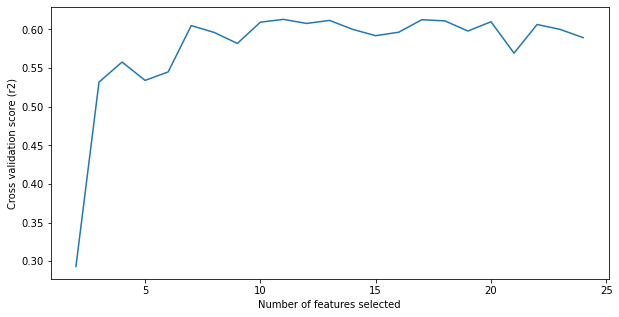

In [34]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (r2)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

### Features selected for modeling:

Variables ranked from 1 to 3 as per the Recursive Feature Elimination and Cross-Validation Feature selection model will be used for prediction models. In addition, we will keep the year to use it for dividing into training, test and validation sets.

<b>Predictor Variables:</b>
<ol>
    <li>YEAR</li>
    <li>RULING_PARTY</li>
    <li>CHANGE_IN_GOVT</li>
    <li>COAL</li>
    <li>NATURAL GAS</li>
    <li>OTHER BIOMASS</li>
    <li>OTHER GASES</li>
    <li>PETROLEUM</li>
    <li>SOLAR THERMAL AND PHOTOVOLTAIC</li>
    <li>WIND</li>
    <li>GEOTHERMAL (BILLION BTU)</li>
    <li>PETROLEUM (BARRELS)</li>
    <li>Median Income</li>
    <li>PRICE_INFLATION_RATE</li>
</ol>

<b>Target Variables:</b>
<ol>
    <li>Carbon_dioxide(MT)</li>
    <li>Sulphur_dioxide(MT)</li>
    <li>Nitric_oxide(MT)</li>
</ol>

### Using XGBoost for predicting emissions

In [35]:
X=electricity_analysis_df[['YEAR','RULING_PARTY','CHANGE_IN_GOVT','COAL','NATURAL GAS','OTHER BIOMASS','OTHER GASES','PETROLEUM','SOLAR THERMAL AND PHOTOVOLTAIC','WIND','GEOTHERMAL (BILLION BTU)','PETROLEUM (BARRELS)','Median Income','PRICE_INFLATION_RATE']]
X['CHANGE_IN_GOVT'] = X['CHANGE_IN_GOVT'].astype(int)
X.head()

<ipython-input-35-824c27453146>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CHANGE_IN_GOVT'] = X['CHANGE_IN_GOVT'].astype(int)


,YEAR,RULING_PARTY,CHANGE_IN_GOVT,COAL,NATURAL GAS,OTHER BIOMASS,OTHER GASES,PETROLEUM,SOLAR THERMAL AND PHOTOVOLTAIC,WIND,GEOTHERMAL (BILLION BTU),PETROLEUM (BARRELS),Median Income,PRICE_INFLATION_RATE
0,2001,1,0,0.003576,0.015239,0.000051,0.000000,0.023522,1.778938e-07,0.000011,0.000000,0.025847,57363.0,0.067115
1,2001,1,0,0.457250,0.037604,0.005923,0.031527,0.011146,1.778938e-07,0.000000,0.000000,0.014785,35160.0,0.008211
2,2001,1,0,0.156840,0.010589,0.002557,0.000000,0.022103,1.778938e-07,0.000000,0.000000,0.022526,33339.0,0.059380
3,2001,1,0,0.253720,0.050355,0.013420,0.000000,0.008181,1.743782e-05,0.000000,0.000000,0.010114,42704.0,0.045768
4,2001,0,0,0.014141,0.437868,0.714854,0.188433,0.075690,1.914038e-02,0.041853,0.946401,0.092529,47262.0,0.278628


In [36]:
y=electricity_analysis_df[['YEAR','Carbon_dioxide(MT)','Sulphur_dioxide(MT)','Nitric_oxide(MT)']]
y.head()

,YEAR,Carbon_dioxide(MT),Sulphur_dioxide(MT),Nitric_oxide(MT)
0,2001,0.017295,0.006623,0.043238
1,2001,0.294601,0.405428,0.424890
2,2001,0.106483,0.073470,0.124335
3,2001,0.175738,0.058488,0.220068
4,2001,0.267917,0.036000,0.265099


In [37]:
from sklearn.model_selection import train_test_split
# split the dataframe into training, testing and validation sets
# We will use data from 2019 for testing
# We will use data from 2001-2018 for training and validation
X_sub=X[X['YEAR']<=2018]
y_sub=y[y['YEAR']<=2018]
X_test=X[X['YEAR']==2019]
y_test=y[y['YEAR']==2019]

#drop the year column
X_sub.drop(['YEAR'],axis=1,inplace=True)
y_sub.drop(['YEAR'],axis=1,inplace=True)
X_test.drop(['YEAR'],axis=1,inplace=True)
y_test.drop(['YEAR'],axis=1,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
#split X_sub into train and validation by stratifying based on CHANGE_IN_GOVT
X_train, X_val, y_train, y_val = train_test_split(X_sub, y_sub, test_size=0.2, random_state=200, stratify=X_sub['CHANGE_IN_GOVT'])

In [39]:
print('Training sample size: %d' %X_train.shape[0])
print('Validation sample size: %d' %X_val.shape[0])
print('Testing sample size: %d' %X_test.shape[0])

Training sample size: 734
Validation sample size: 184
Testing sample size: 51


### Hypertuning parameters of XGBoost and MultiOutputRegressor to get the best values to model

In [40]:
!pip install xgboost
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline

# fitting a multioutput regressor to an XGBoost Regressor
pipe_xgb = Pipeline([('reg', MultiOutputRegressor(xgb.XGBRegressor()))])

# Various hyper-parameters to tune
parameters = {'reg__estimator__learning_rate': [.03, 0.05, .07], #so called `eta` value
              'reg__estimator__max_depth': [5, 6, 7],
              'reg__estimator__subsample': [0.7, 0.9, 1],
              'reg__estimator__n_estimators': [50, 100, 500]
             }

# define cross validation evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=6156)

#run grid search for various parameters
xgb_grid = GridSearchCV(pipe_xgb,
                        parameters,
                        cv = cv,
                        n_jobs = 5,
                        verbose=True)

#run the grid search fit on the X_sub which has data of both training and validation sets
xgb_grid.fit(X_sub,y_sub)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)


Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   15.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  4.2min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed: 10.0min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed: 17.3min
[Parallel(n_jobs=5)]: Done 810 out of 810 | elapsed: 19.4min finished


0.9510116536513484
{'reg__estimator__learning_rate': 0.03, 'reg__estimator__max_depth': 7, 'reg__estimator__n_estimators': 500, 'reg__estimator__subsample': 0.7}


In [41]:
# Using the best features run the MultiOutputRegressor for the training dataset
multiregressor = MultiOutputRegressor(xgb.XGBRegressor(n_estimators=500, max_depth=7, subsample= 0.7, learning_rate= 0.03, random_state=6156)).fit(X_train, y_train)


In [42]:
#get the coefficient of determination R-squared value for training set
score = multiregressor.score(X_train, y_train)  
print("Training R-squared: ", score)

Training R-squared:  0.9999144024908487


### Checking the accuracy of the model on Validation data set

In [43]:
#get the coefficient of determination R-squared value for validation set
score = multiregressor.score(X_val, y_val)  
print("Validation R-squared: ", score)

Validation R-squared:  0.9659828714695989


In [44]:
#get the mean squared error of the predicted values vs the actual values for Validation set 
#for each of the target variables
y_pred=multiregressor.predict(X_val)
print("Carbon dioxide MSE:%.4f" % mean_squared_error(y_val.iloc[:, 0:1], y_pred[:, 0:1]))
print("Sulphur dioxide MSE:%.4f" % mean_squared_error(y_val.iloc[:,1:2], y_pred[:,1:2]))
print("Nitric oxide MSE:%.4f" % mean_squared_error(y_val.iloc[:,:2], y_pred[:,:2]))

Carbon dioxide MSE:0.0000
Sulphur dioxide MSE:0.0007
Nitric oxide MSE:0.0004


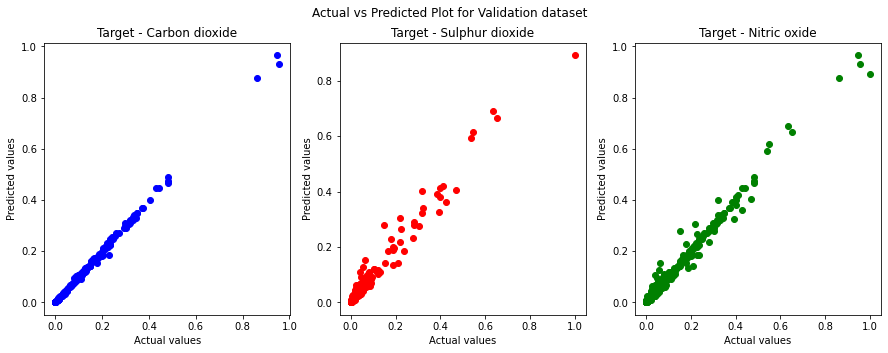

In [45]:
fig=plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, 3)
fig.suptitle('Actual vs Predicted Plot for Validation dataset')
ax1=fig.add_subplot(gs[0, 0])
ax1.scatter(y_val.iloc[:, 0:1], y_pred[:, 0:1], color='blue')
ax1.set_xlabel("Actual values")
ax1.set_ylabel("Predicted values")
ax1.title.set_text("Target - Carbon dioxide")
ax2=fig.add_subplot(gs[0, 1])
ax2.scatter(y_val.iloc[:,1:2], y_pred[:,1:2], color='red')
ax2.set_xlabel("Actual values")
ax2.set_ylabel("Predicted values")
ax2.title.set_text("Target - Sulphur dioxide")
ax3=fig.add_subplot(gs[0, 2])
ax3.scatter(y_val.iloc[:,:2], y_pred[:,:2], color='green')
ax3.set_xlabel("Actual values")
ax3.set_ylabel("Predicted values")
ax3.title.set_text("Target - Nitric oxide")
plt.show()

### Checking the accuracy of the model on Test data set

In [46]:
#get the coefficient of determination R-squared value for test set
score = multiregressor.score(X_test, y_test)  
print("Testing R-squared: ", score)

Testing R-squared:  0.8646466080160069


In [47]:
#get the mean squared error of the predicted values vs the actual values for test set 
#for each of the target variables
y_pred=multiregressor.predict(X_test)
from sklearn.metrics import mean_squared_error
print("Carbon dioxide MSE:%.4f" % mean_squared_error(y_test.iloc[:, 0:1], y_pred[:, 0:1]))
print("Sulphur dioxide MSE:%.4f" % mean_squared_error(y_test.iloc[:,1:2], y_pred[:,1:2]))
print("Nitric oxide MSE:%.4f" % mean_squared_error(y_test.iloc[:,:2], y_pred[:,:2]))

Carbon dioxide MSE:0.0002
Sulphur dioxide MSE:0.0002
Nitric oxide MSE:0.0002


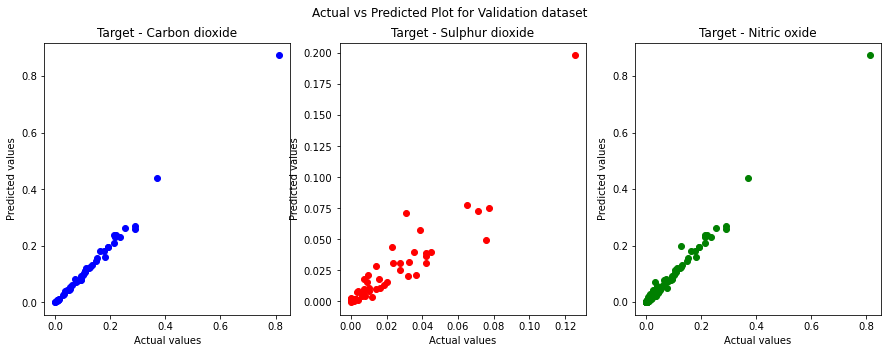

In [48]:
fig=plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, 3)
fig.suptitle('Actual vs Predicted Plot for Validation dataset')
ax1=fig.add_subplot(gs[0, 0])
ax1.scatter(y_test.iloc[:, 0:1], y_pred[:, 0:1], color='blue')
ax1.set_xlabel("Actual values")
ax1.set_ylabel("Predicted values")
ax1.title.set_text("Target - Carbon dioxide")
ax2=fig.add_subplot(gs[0, 1])
ax2.scatter(y_test.iloc[:,1:2], y_pred[:,1:2], color='red')
ax2.set_xlabel("Actual values")
ax2.set_ylabel("Predicted values")
ax2.title.set_text("Target - Sulphur dioxide")
ax3=fig.add_subplot(gs[0, 2])
ax3.scatter(y_test.iloc[:,:2], y_pred[:,:2], color='green')
ax3.set_xlabel("Actual values")
ax3.set_ylabel("Predicted values")
ax3.title.set_text("Target - Nitric oxide")
plt.show()

## Conclusion:

<ol>
    <li>Target variables selected were - Carbon_dioxide(MT), Sulphur_dioxide(MT), Nitric_oxide(MT)</li>
    <li>Two feature selection methods were used to select the best features to use in the prediction model - SelectKBest and Recursive Feature Elimination and Cross-Validation(RFECV) Selection with Decision Tree Regressor</li>
    <li>SelectKBest gave best features for each of the target variables which were different for each of the target variables. RFECV ranked the features by relavance for all three target variables</li>
    <li>Best features to predict the target variables are - YEAR, RULING_PARTY, CHANGE_IN_GOVT, COAL, NATURAL GAS, OTHER BIOMASS, OTHER GASES, PETROLEUM, SOLAR THERMAL AND PHOTOVOLTAIC, WIND, GEOTHERMAL (BILLION BTU), PETROLEUM (BARRELS), Median Income and PRICE_INFLATION_RATE</li>
    <li>The Multi-Output Regressor with XGBoost Regressor model was used to create a prediction model for all three target variables</li>
    <li>We got an R-squared of 96% with the validation data sets and an R-squared of 86% with the test datasets</li>
    <li>The model can explain 96% of variance in the three target variables for the validation dataset and 86% of the variance for the test dataset</li>
</ol>

## Predicting Ruling Party using Random Forests Classifier

###  Prediction using all feature variables

In [49]:
X=electricity_analysis_df[electricity_analysis_df.columns.difference(['ELECTION_RESULT','STATE','STATE_NAME','RULING_PARTY'])]
X.head()

,CHANGE_IN_GOVT,COAL,COAL (SHORT TONS),Carbon_dioxide(MT),ELECTRICITY_REVENUE_GROWTH,GENERATION_TOTAL,GEOTHERMAL,GEOTHERMAL (BILLION BTU),HYDROELECTRIC CONVENTIONAL,Median Income,...,OTHER GASES (BILLION BTU),PETROLEUM,PETROLEUM (BARRELS),PRICE_INFLATION_RATE,PUMPED STORAGE,SOLAR THERMAL AND PHOTOVOLTAIC,Sulphur_dioxide(MT),WIND,WOOD AND WOOD DERIVED FUELS,YEAR
0,0.0,0.003576,0.005399,0.017295,0.073740,0.013884,0.000000,0.000000,0.014656,57363.0,...,0.00000,0.023522,0.025847,0.067115,0.716191,1.778938e-07,0.006623,0.000011,0.000111,2001
1,0.0,0.457250,0.307881,0.294601,-0.051074,0.259351,0.000000,0.000000,0.091011,35160.0,...,0.05108,0.011146,0.014785,0.008211,0.716191,1.778938e-07,0.405428,0.000000,0.670928,2001
2,0.0,0.156840,0.137104,0.106483,0.052058,0.097599,0.000000,0.000000,0.027753,33339.0,...,0.00000,0.022103,0.022526,0.059380,0.716191,1.778938e-07,0.073470,0.000000,0.242036,2001
3,0.0,0.253720,0.183996,0.175738,0.021301,0.186014,0.000000,0.000000,0.083029,42704.0,...,0.00000,0.008181,0.010114,0.045768,0.804527,1.743782e-05,0.058488,0.000000,0.000111,2001
4,0.0,0.014141,0.008803,0.267917,0.202604,0.410958,0.929493,0.946401,0.278179,47262.0,...,0.20317,0.075690,0.092529,0.278628,0.604390,1.914038e-02,0.036000,0.041853,0.534509,2001


In [50]:
y=electricity_analysis_df['RULING_PARTY']
y.head()

0    1
1    1
2    1
3    1
4    0
Name: RULING_PARTY, dtype: int64

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score 

#partitioning of data by using 2 years as testing data
test_size = 102
X_train = X[:-test_size]
X_test = X[-test_size:]
y_train = y[:-test_size]
y_test = y[-test_size:]

In [52]:
#create model
rf = RandomForestClassifier(random_state=6156, n_jobs=-1)

In [53]:
#parameters for grid search
params = {
    'max_depth': [2,3,4,5,7,9,10],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,50,75,100]
}

In [54]:
#run grid search
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [55]:
#fit the model
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 210 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 514 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:   26.8s finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=6156),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 7, 9, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 75, 100]},
             scoring='accuracy', verbose=1)

In [56]:
#identify best parameters
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 50}

In [57]:
#get score of best model
grid_search.best_score_

0.9146132019115891

In [58]:
#prediction
prediction_labels = grid_search.predict(X_test)

In [59]:
#evaluation
results = confusion_matrix(y_test, prediction_labels)
print ('Confusion Matrix:')
print(results) 
print('Accuracy Score:',accuracy_score(y_test, prediction_labels))
print('Report:')
print(classification_report(y_test, prediction_labels))

Confusion Matrix:
[[44  0]
 [ 3 55]]
Accuracy Score: 0.9705882352941176
Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        44
           1       1.00      0.95      0.97        58

    accuracy                           0.97       102
   macro avg       0.97      0.97      0.97       102
weighted avg       0.97      0.97      0.97       102



###  Prediction using important feature variables

In [60]:
#create the X and y for fitting to models
X=electricity_analysis_df[electricity_analysis_df.columns.difference(['ELECTION_RESULT','STATE','STATE_NAME','RULING_PARTY'])]
X.head()

,CHANGE_IN_GOVT,COAL,COAL (SHORT TONS),Carbon_dioxide(MT),ELECTRICITY_REVENUE_GROWTH,GENERATION_TOTAL,GEOTHERMAL,GEOTHERMAL (BILLION BTU),HYDROELECTRIC CONVENTIONAL,Median Income,...,OTHER GASES (BILLION BTU),PETROLEUM,PETROLEUM (BARRELS),PRICE_INFLATION_RATE,PUMPED STORAGE,SOLAR THERMAL AND PHOTOVOLTAIC,Sulphur_dioxide(MT),WIND,WOOD AND WOOD DERIVED FUELS,YEAR
0,0.0,0.003576,0.005399,0.017295,0.073740,0.013884,0.000000,0.000000,0.014656,57363.0,...,0.00000,0.023522,0.025847,0.067115,0.716191,1.778938e-07,0.006623,0.000011,0.000111,2001
1,0.0,0.457250,0.307881,0.294601,-0.051074,0.259351,0.000000,0.000000,0.091011,35160.0,...,0.05108,0.011146,0.014785,0.008211,0.716191,1.778938e-07,0.405428,0.000000,0.670928,2001
2,0.0,0.156840,0.137104,0.106483,0.052058,0.097599,0.000000,0.000000,0.027753,33339.0,...,0.00000,0.022103,0.022526,0.059380,0.716191,1.778938e-07,0.073470,0.000000,0.242036,2001
3,0.0,0.253720,0.183996,0.175738,0.021301,0.186014,0.000000,0.000000,0.083029,42704.0,...,0.00000,0.008181,0.010114,0.045768,0.804527,1.743782e-05,0.058488,0.000000,0.000111,2001
4,0.0,0.014141,0.008803,0.267917,0.202604,0.410958,0.929493,0.946401,0.278179,47262.0,...,0.20317,0.075690,0.092529,0.278628,0.604390,1.914038e-02,0.036000,0.041853,0.534509,2001


In [61]:
y=electricity_analysis_df['RULING_PARTY']
y.head()

0    1
1    1
2    1
3    1
4    0
Name: RULING_PARTY, dtype: int64

In [62]:
# feature extraction
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(X, y)

# summarize scores
set_printoptions(formatter={'float_kind':'{:f}'.format}, precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[0.319177 83.830341 86.786400 53.616141 6.737162 7.890854 26.082953
 25.780895 36.325310 156.573473 2.339644 2.746994 6.386695 51.257246
 33.293469 172.415646 6.156576 4.453100 8.981648 8.663634 1.931661
 3.818351 3.961162 21.517509 1.889115 0.271480 1.609120]
[[0.003576 0.005399 0.017295 57363.000000 0.000051]
 [0.457250 0.307881 0.294601 35160.000000 0.005923]
 [0.156840 0.137104 0.106483 33339.000000 0.002557]
 [0.253720 0.183996 0.175738 42704.000000 0.013420]
 [0.014141 0.008803 0.267917 47262.000000 0.714854]]


In [63]:
X.columns.to_list()

['CHANGE_IN_GOVT',
 'COAL',
 'COAL (SHORT TONS)',
 'Carbon_dioxide(MT)',
 'ELECTRICITY_REVENUE_GROWTH',
 'GENERATION_TOTAL',
 'GEOTHERMAL',
 'GEOTHERMAL (BILLION BTU)',
 'HYDROELECTRIC CONVENTIONAL',
 'Median Income',
 'NATURAL GAS',
 'NATURAL GAS (MCF)',
 'NUCLEAR',
 'Nitric_oxide(MT)',
 'OTHER',
 'OTHER BIOMASS',
 'OTHER GASES',
 'OTHER GASES (BILLION BTU)',
 'PETROLEUM',
 'PETROLEUM (BARRELS)',
 'PRICE_INFLATION_RATE',
 'PUMPED STORAGE',
 'SOLAR THERMAL AND PHOTOVOLTAIC',
 'Sulphur_dioxide(MT)',
 'WIND',
 'WOOD AND WOOD DERIVED FUELS',
 'YEAR']

#### Using SelectKBest approach with ANOVA F-value method, the best features are related to indexes: 1, 2, 3, 9, 13, 15 which are COAL,  COAL (SHORT TONS), Carbon_dioxide(MT), Median Income, Nitric_oxide(MT), OTHER BIOMASS

In [64]:
from sklearn.svm import SVC
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 2  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    #cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)

In [65]:
rfecv.fit(X,y)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 6


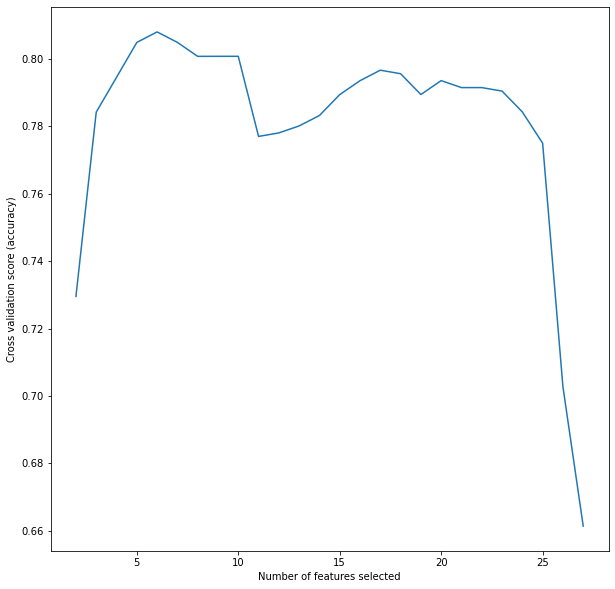

In [66]:
# Plot number of features VS. cross-validation scores
plt.rcParams["figure.figsize"] = [10,10]
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [67]:
#print the column, ranking and support for all features in X
print("Column : Feature Ranking: Support")
for index in range(0,len(X.columns)):
    print(X.columns[index],':',rfecv.ranking_[index], ':',rfecv.support_[index] )#print(X.columns[index]+':'+rfecv.ranking_[index])


Column : Feature Ranking: Support
CHANGE_IN_GOVT : 19 : False
COAL : 2 : False
COAL (SHORT TONS) : 6 : False
Carbon_dioxide(MT) : 1 : True
ELECTRICITY_REVENUE_GROWTH : 8 : False
GENERATION_TOTAL : 11 : False
GEOTHERMAL : 5 : False
GEOTHERMAL (BILLION BTU) : 7 : False
HYDROELECTRIC CONVENTIONAL : 10 : False
Median Income : 22 : False
NATURAL GAS : 1 : True
NATURAL GAS (MCF) : 1 : True
NUCLEAR : 12 : False
Nitric_oxide(MT) : 1 : True
OTHER : 9 : False
OTHER BIOMASS : 1 : True
OTHER GASES : 13 : False
OTHER GASES (BILLION BTU) : 3 : False
PETROLEUM : 18 : False
PETROLEUM (BARRELS) : 14 : False
PRICE_INFLATION_RATE : 15 : False
PUMPED STORAGE : 4 : False
SOLAR THERMAL AND PHOTOVOLTAIC : 21 : False
Sulphur_dioxide(MT) : 1 : True
WIND : 17 : False
WOOD AND WOOD DERIVED FUELS : 16 : False
YEAR : 20 : False


### Features selected for modeling:

Variables ranked from 1 to 3 as per the Recursive Feature Elimination and Cross-Validation Feature selection model will be used for prediction models. In addition, we will also keep CHANGE_IN_GOVT.

<b>Predictor Variables:</b>
<ol>
    <li>Carbon_dioxide(MT)</li>
    <li>NATURAL GAS</li>
    <li>NATURAL GAS (MCF)</li>
    <li>Nitric_oxide(MT)</li>
    <li>OTHER BIOMASS</li>
    <li>Sulphur_dioxide(MT)</li>
    <li>COAL</li>
    <li>OTHER GASES (BILLION BTU)</li>
    <li>CHANGE_IN_GOVT</li>
</ol>

<b>Target Variable:</b>
<ol>
    <li>RULING_PARTY</li>
</ol>

In [68]:
#new X dataset with 9 predictor variables
X2 = electricity_analysis_df[['CHANGE_IN_GOVT', 'COAL', 'NATURAL GAS','NATURAL GAS (MCF)', 'OTHER BIOMASS', 'OTHER GASES (BILLION BTU)', 'Carbon_dioxide(MT)', 'Sulphur_dioxide(MT)', 'Nitric_oxide(MT)' ]]


In [69]:
#partitioning of data
X2_train = X2[:-test_size]
X2_test = X2[-test_size:]
y2_train = y[:-test_size]
y2_test = y[-test_size:]

In [70]:
#fit the second model
grid_search.fit(X2_train, y2_train)

Fitting 4 folds for each of 210 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:   28.2s finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=6156),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 7, 9, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 75, 100]},
             scoring='accuracy', verbose=1)

In [71]:
#identify best parameters
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 25}

In [72]:
#get score of best model
grid_search.best_score_

0.8961160180918245

In [73]:
#prediction
prediction_labels = grid_search.predict(X2_test)

In [74]:
#evaluation
results = confusion_matrix(y2_test, prediction_labels)
print ('Confusion Matrix:')
print(results) 
print('Accuracy Score:',accuracy_score(y2_test, prediction_labels))
print('Report:')
print(classification_report(y2_test, prediction_labels))

Confusion Matrix:
[[41  3]
 [ 8 50]]
Accuracy Score: 0.8921568627450981
Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        44
           1       0.94      0.86      0.90        58

    accuracy                           0.89       102
   macro avg       0.89      0.90      0.89       102
weighted avg       0.90      0.89      0.89       102



## Conclusion:

<ol>
    <li>Target variable selected was - RULING_PARTY</li>
    <li>Two feature selection methods were used to select the best features to use in the prediction model - SelectKBest and Recursive Feature Elimination and Cross-Validation(RFECV) Selection with SVC</li>
    <li>SelectKBest gave best features as COAL, COAL (SHORT TONS), Carbon_dioxide(MT), Median Income, Nitric_oxide(MT) and OTHER BIOMASS. RFECV showed 6 features to be the best and ranked the features by relavance as - NATURAL GAS, NATURAL GAS (MCF), OTHER BIOMASS, Carbon_dioxide(MT), Sulphur_dioxide(MT), Nitric_oxide(MT)</li>
    <li>Three other features were also added to this list - COAL, OTHER GASES (BILLION BTU) and CHANGE_IN_GOVT</li>
    <li>We created two Random Forest models, one with all 27 features and another with the best selected features</li>
    <li>For evaluation, we fitted the models with the training data, and looked at the accuracy.</li>
    <li>The first model gave an accuracy of 97.05% which means it predicts the RULING_PARTY with an accuracy of 97% when all features are included in the model.</li>
    <li>The second model gave an accuracy of 89.21% which means it predicts the RULING_PARTY with an accuracy of 89% when the best selected features are included in the model.</li>
    <li>The second model is considered better because it is not overfitted and yet has a good accuracy score</li>
</ol>